<a href="https://colab.research.google.com/github/yue-zhongqi/cartpole_colab/blob/main/cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial and Sample Code for Balancing a Pole on a Cart

## Installing dependencies:
## Notice: following code only include necessities to load a pre-trained model, please refer to note DQN2 to training part

In [1]:
# This would ignore some warning that will not affect code
import warnings
warnings.filterwarnings("ignore")
# This would disable some OpenMP lib conflict that cause kernel crash, if environment is stable, it is unnecessary
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import random
from collections import deque
import gym

In [4]:
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [6]:
def get_action(observation, model):
    observation_tensor = torch.FloatTensor(observation).unsqueeze(0)
    with torch.no_grad():
        q_values = model(observation_tensor)
        action = q_values.max(1)[1].item()
    return action

## Importing dependencies and define helper functions

In [3]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

## Tutorial: Loading CartPole environment

In [7]:
env = gym.make("CartPole-v1")

In [8]:
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

model = DQN(state_dim, action_dim)
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

DQN(
  (fc1): Linear(in_features=4, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
observation = env.reset()
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, info = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 10.0


## Task 1: Development of an RL agent

For Task 1, we can show the observation and chosen action below:

In [9]:
observation = env.reset()
action = get_action(observation,model)
print("Observation:", observation)
print("Chosen action:", action)

Observation: [ 0.02040378 -0.01287918  0.0160006  -0.04395234]
Chosen action: 0


## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

Print the average reward over the 100 episodes.

C:\Users\GuShucheng\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


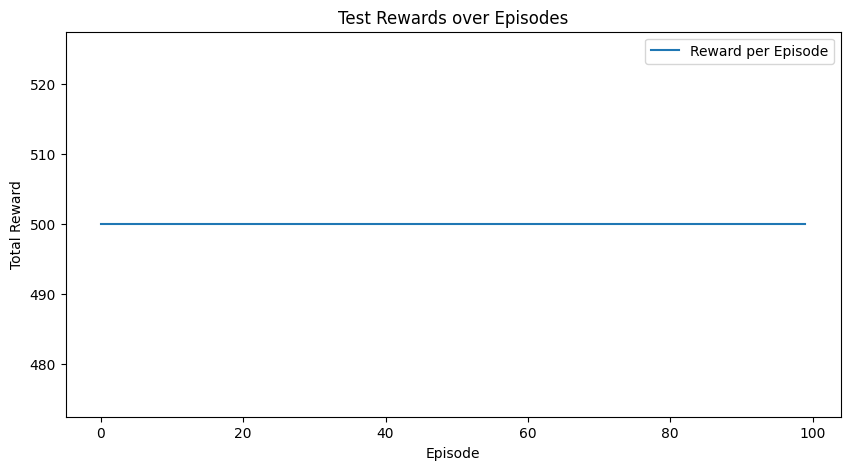

Average Reward: 500.0


In [10]:
def test_dqn(env,model, episode=10):
    episode_rewards = []
    for ep in range(episode):
        state = env.reset()
        total_reward = 0
        while True:
            action = get_action(state, model)
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            state = next_state
            if done:
                break
        episode_rewards.append(total_reward)
    
    plt.figure(figsize=(10, 5))
    plt.plot(episode_rewards, label='Reward per Episode')
    plt.title('Cumulative reward for each episode')
    plt.ylabel('Cumulative reward')
    plt.xlabel('episode')
    plt.legend()
    plt.show()
    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"Average Reward: {average_reward}")

    
test_dqn(env,model, 100)

## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [12]:
env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()
while True:
    env.render()
    #your agent goes here
    action = get_action(observation,model)
    observation, reward, done, info = env.step(action) 
    if done: 
      break;    
env.close()
show_video()


#Uncomment following in case you cannot display video in Google Colab

# from google.colab import files
# video_path = 'video/CartPole-v1.mp4'
# import glob
# video_files = glob.glob('video/*.mp4')
# print(video_files)
# if video_files:
#     video_path = video_files[0]
#     files.download(video_path)
# else:
#     print("No video files found")



C:\Users\GuShucheng\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
